In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import numpy as np

In [5]:
# Load your data here
data = np.load('data.npy')
target = np.load('target.npy')

In [6]:
# Split your data into training and validation sets
train_data, val_data, train_target, val_target = train_test_split(data, target, test_size=0.2)

In [7]:
# Define your model here
model = Sequential()

model.add(Conv2D(200, (3, 3), input_shape=(224, 224, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(75, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 classes for hand signs

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Define your data generator here
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [16]:
# Define your checkpoint callback here
checkpoint = ModelCheckpoint('model-{epoch:03d}.h5', monitor='val_loss', verbose=0, mode='min')

In [17]:
# Create a generator for the training data
train_generator = datagen.flow(train_data, train_target, batch_size=32)

In [18]:
# Create a generator for the validation data
val_generator = datagen.flow(val_data, val_target, batch_size=32)

In [19]:
# Train the model using the generators
history = model.fit(train_generator, epochs=20, validation_data=val_generator, callbacks=[checkpoint])

Epoch 1/20
20/20 [==============================] - 102s 5s/step - loss: 1.9440 - accuracy: 0.2215 - val_loss: 1.6974 - val_accuracy: 0.4717
Epoch 2/20
20/20 [==============================] - 108s 5s/step - loss: 1.1474 - accuracy: 0.6472 - val_loss: 0.6466 - val_accuracy: 0.7925
Epoch 3/20
20/20 [==============================] - 109s 5s/step - loss: 0.7254 - accuracy: 0.7753 - val_loss: 0.7859 - val_accuracy: 0.7044
Epoch 4/20
20/20 [==============================] - 107s 5s/step - loss: 0.6175 - accuracy: 0.7959 - val_loss: 0.5704 - val_accuracy: 0.8428
Epoch 5/20
20/20 [==============================] - 103s 5s/step - loss: 0.4654 - accuracy: 0.8481 - val_loss: 0.4934 - val_accuracy: 0.8742
Epoch 6/20
20/20 [==============================] - 103s 5s/step - loss: 0.4023 - accuracy: 0.8639 - val_loss: 0.3784 - val_accuracy: 0.8742
Epoch 7/20
20/20 [==============================] - 106s 5s/step - loss: 0.2616 - accuracy: 0.9114 - val_loss: 0.3366 - val_accuracy: 0.8868
Epoch 8/20
20

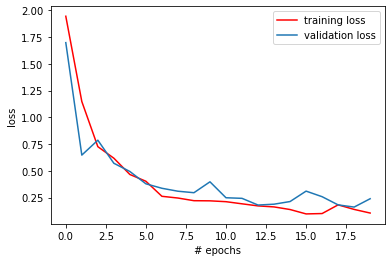

In [20]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

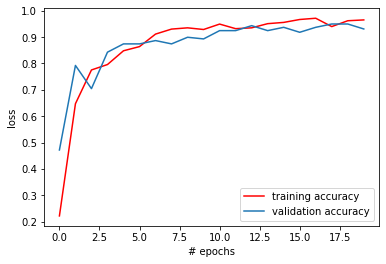

In [21]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
# Evaluate the model on the validation data to estimate the test accuracy
val_loss, val_acc = model.evaluate(val_data, val_target, verbose=2)
print('Val loss:', val_loss)
print('val accuracy:', val_acc)

5/5 - 6s - loss: 0.0864 - accuracy: 0.9686 - 6s/epoch - 1s/step
Val loss: 0.08641903102397919
val accuracy: 0.9685534834861755


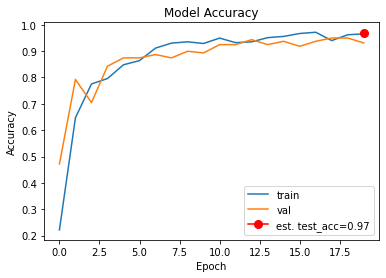

In [26]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(len(history.history['val_accuracy'])-1, val_acc, marker='o', markersize=8, color="red")
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'val', f'est. test_acc={val_acc:.2f}'], loc='lower right')
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix

# Use the model to make predictions on the validation data
y_pred = model.predict(val_data)

# Convert the predicted labels from one-hot encoding to integers
y_pred = np.argmax(y_pred, axis=1)

# Convert the true labels from one-hot encoding to integers
y_true = np.argmax(val_target, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

print(cm)


5/5 [==============================] - 6s 1s/step
[[17  0  0  0  0  0  0]
 [ 0 18  0  1  0  0  0]
 [ 0  0 31  0  0  0  1]
 [ 0  0  1 27  1  0  0]
 [ 0  0  0  0 26  0  0]
 [ 0  0  0  0  0 17  0]
 [ 1  0  0  0  0  0 18]]


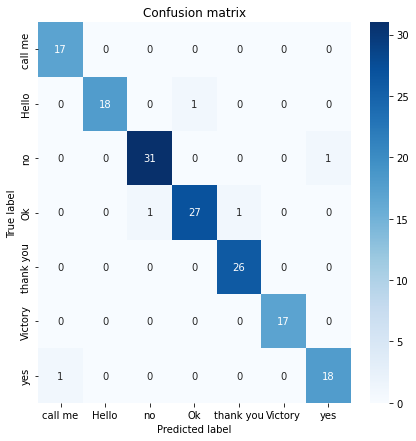

In [29]:
import seaborn as sns

classes = ['call me','Hello', 'no','Ok','thank you','Victory','yes']


# Plot the confusion matrix
plt.figure(figsize=(7, 7))
sns.heatmap(cm, cmap='Blues', annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.title('Confusion matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [30]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Calculate precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.9689111843199893
Recall: 0.9685534591194969
F1 score: 0.9684521407142307
